In [69]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [70]:
# Download NLTK resources (only the first time)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
# Load the dataset
file_path = 'emails.csv'
data = pd.read_csv(file_path)
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [72]:
# Preprocessing function: Tokenization, lemmatization, punctuation & stopword removal
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [73]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize the tokens
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Rejoin the cleaned tokens into a single string
    return ' '.join(cleaned_tokens)

In [74]:
# Apply preprocessing to the 'text' column
data['cleaned_text'] = data['text'].apply(preprocess_text)

In [75]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=100)

In [76]:
# Fit and transform the cleaned text data
X_tfidf = vectorizer.fit_transform(data['cleaned_text'])

In [77]:
# Target variable
y = data['spam']

In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)


In [79]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [80]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
# Predict on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1] 

In [82]:
# Evaluate the model
accuracy = rf_model.score(X_test, y_test)
report = classification_report(y_test, y_pred)

In [83]:
# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9610238510762071
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1278
           1       0.93      0.92      0.92       441

    accuracy                           0.96      1719
   macro avg       0.95      0.95      0.95      1719
weighted avg       0.96      0.96      0.96      1719



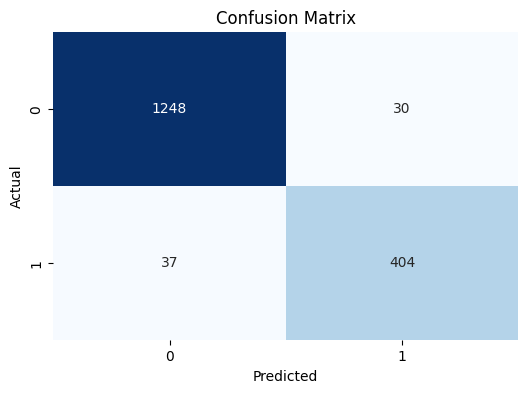

In [84]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [85]:
# Feature Importance
feature_names = vectorizer.get_feature_names_out()
feature_importances = rf_model.feature_importances_

# Create a DataFrame for features and their importances
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

In [86]:
# Sort by importance and display top 10 features
feature_df_sorted = feature_df.sort_values(by='Importance', ascending=False).head(10)

# Display the top 10 important features
print("Top 10 Important Features:\n", feature_df_sorted)

Top 10 Important Features:
      Feature  Importance
92     vince    0.136573
35     enron    0.104710
11      2000    0.044891
89    thanks    0.044276
49  kaminski    0.034004
84   subject    0.031763
19        cc    0.030218
77  research    0.028311
69    please    0.021245
46      http    0.019580


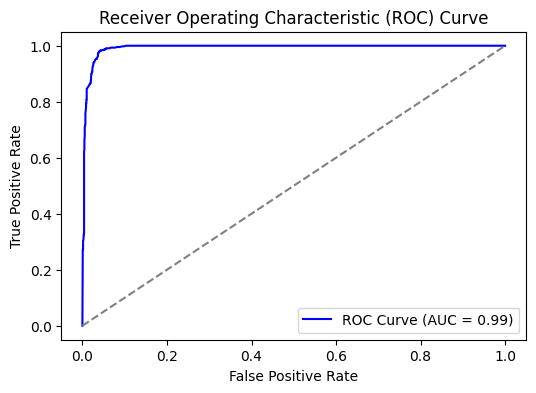

In [87]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()